# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

# Import Data

In [2]:
from ham import create_dataset,get_default_dataset,classes

height,width = 28,28 # Only change this line if using a different image size
channel = 3
input_shape = (height, width, channel)
reshape = (-1,height,width,channel)

In [3]:
if height == width == 28:
    # Use default dataset
    data,testset,data_meta,testset_meta = get_default_dataset()
else:
    # Generate the dataset (if using a different shape) - runs for 5 mins
    data,testset,data_meta,testset_meta  = create_dataset(resize=(height, width))


Downloading...
From (uriginal): https://drive.google.com/uc?id=1vNLwZ4ao7eZTAeH0JRIhaZ1QbiP3LsDG
From (redirected): https://drive.google.com/uc?id=1vNLwZ4ao7eZTAeH0JRIhaZ1QbiP3LsDG&confirm=t&uuid=16140c5d-1eaa-497f-9a64-8951fd8dec2a
To: c:\Users\mraji855\Desktop\HAM10000\file.zip
100%|██████████| 1.37G/1.37G [00:22<00:00, 59.6MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1w6eRHc4sKJ1jzh5gU112HK8mfgraqcIj
From (redirected): https://drive.google.com/uc?id=1w6eRHc4sKJ1jzh5gU112HK8mfgraqcIj&confirm=t&uuid=4959ba59-4a7b-40ac-afe4-88f7e033ca86
To: c:\Users\mraji855\Desktop\HAM10000\file.zip
100%|██████████| 1.40G/1.40G [00:23<00:00, 60.4MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1n71CVP_3-OpcwSaC6z1Y1JCyCznzVP9t
From (redirected): https://drive.google.com/uc?id=1n71CVP_3-OpcwSaC6z1Y1JCyCznzVP9t&confirm=t&uuid=02e34f5d-434b-484e-9749-7eb81965faa7
To: c:\Users\mraji855\Desktop\HAM10000\file.zip
100%|██████████| 420M/420M [00:07<00:00, 58.2MB/s] 

In [4]:
print(f"No of Missing Cells in train data {data.isnull().any().sum()}")
print(f"No of Missing Cells in test data {testset.isnull().any().sum()}")

No of Missing Cells in train data 0
No of Missing Cells in test data 0


In [5]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [6]:
tabular_data = data_meta
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

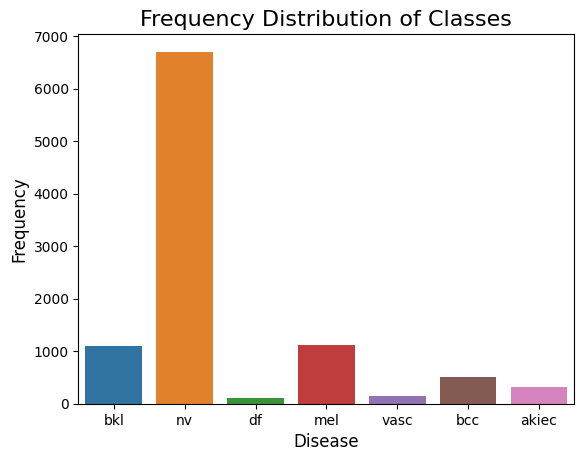

In [7]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

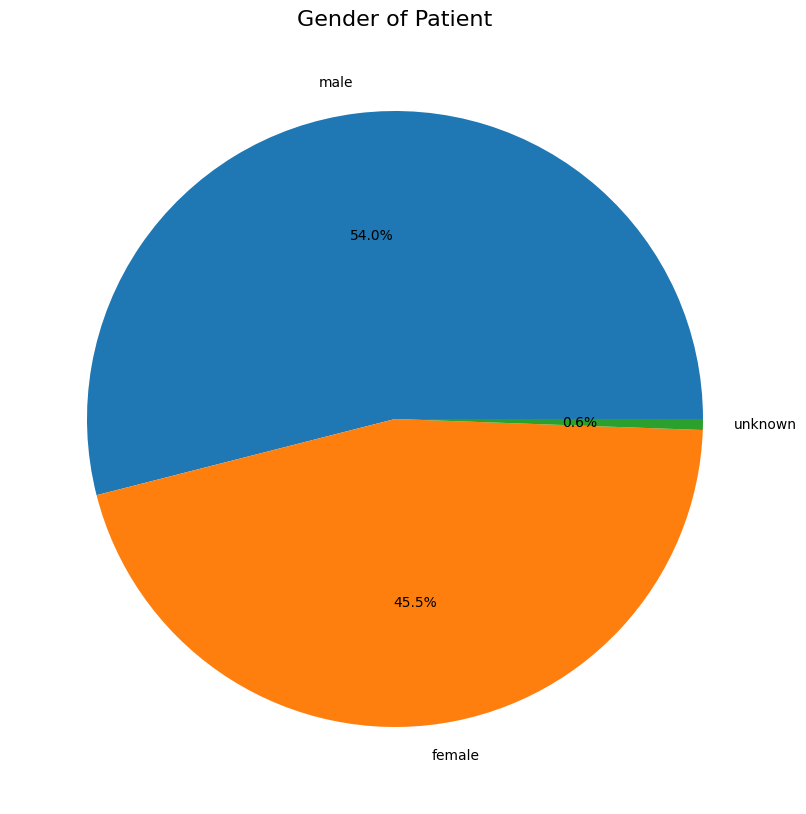

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

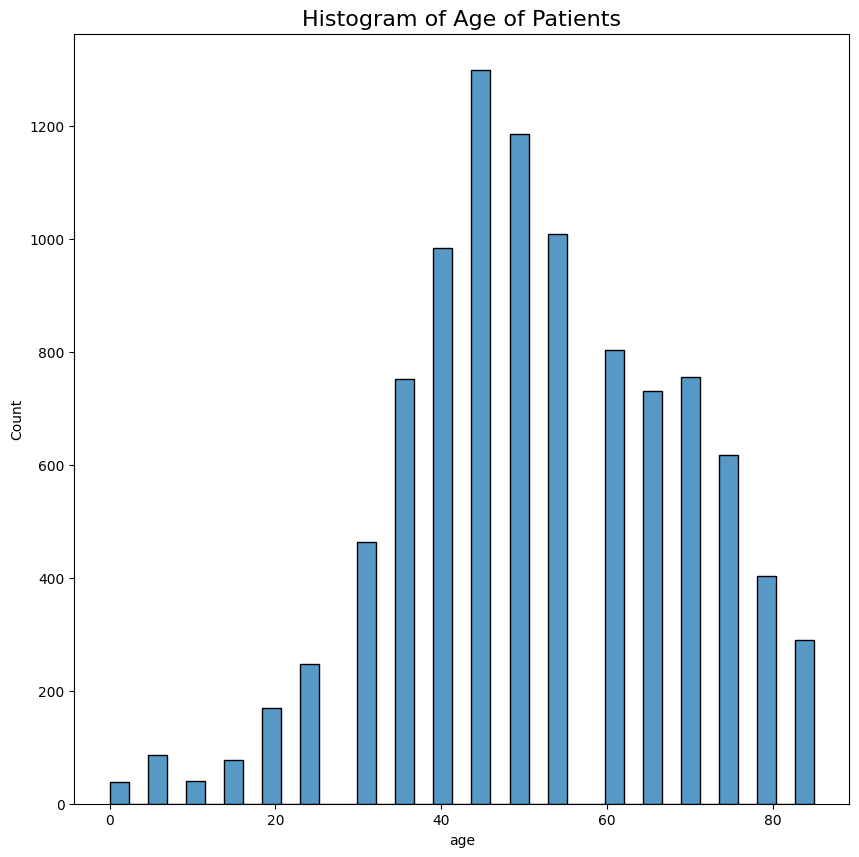

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

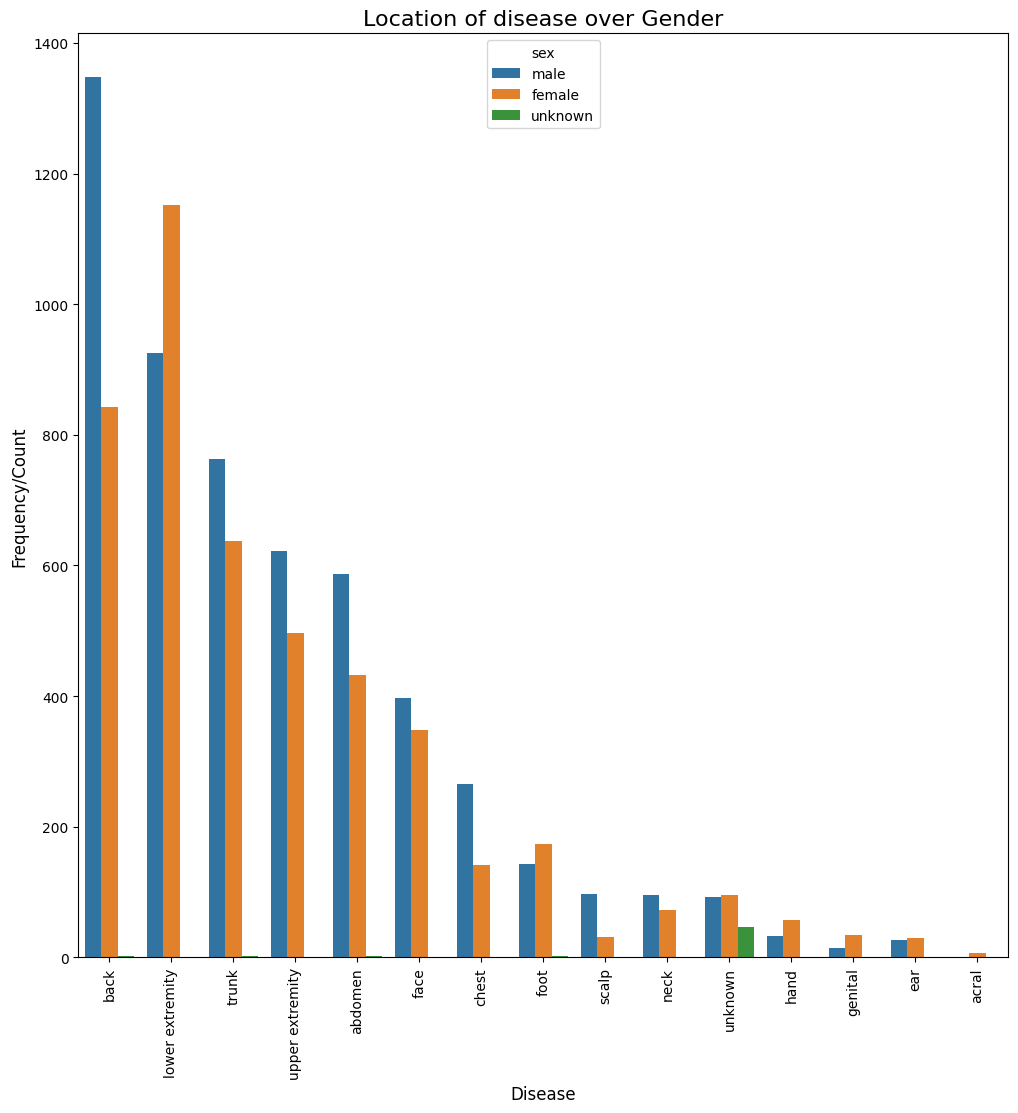

In [10]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace** 

`You can remove the Oversampler by commenting out the cell below`

In [11]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x= np.array(x).reshape(reshape)
print('Shape of X :',x.shape)


Shape of X : (46935, 40, 40, 3)


# Standardization and Splitting Data
`You can remove the standardization by commenting the line below`

In [13]:
x = (x-np.mean(x))/np.std(x)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [14]:
# Custom CNN Architecture

# model = Sequential()
# model.add(Conv2D(16, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', padding = 'same'))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(7, activation='softmax'))
# model.summary()

## Change below cell to suit pretrained Model
`Change the below cell to your assigned pre-trained model`

`Note that each pretrained model might have it's recommended image size`

In [15]:
# Using Pretrained Model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D


# Pretrained Model
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 2,342,279
Trainable params: 84,295
Non-tra

In [16]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 25,
                    callbacks=[callback])

Epoch 1/25
235/235 [==============================] - ETA: 0s - loss: 1.0639 - accuracy: 0.6145
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 39s 148ms/step - loss: 1.0639 - accuracy: 0.6145 - val_loss: 0.6127 - val_accuracy: 0.7948
Epoch 2/25
235/235 [==============================] - ETA: 0s - loss: 0.4515 - accuracy: 0.8490
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 31s 131ms/step - loss: 0.4515 - accuracy: 0.8490 - val_loss: 0.3606 - val_accuracy: 0.8831
Epoch 3/25
235/235 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9122
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 33s 142ms/step - loss: 0.2721 - accuracy: 0.9122 - val_loss: 0.2686 - val_accuracy: 0.9158
Epoch 4/25
235/235 [==============================] - ETA: 0s - loss: 0.1811 - accuracy: 0.9435
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 33s 141ms/step 

# Plot Accuracy and Loss

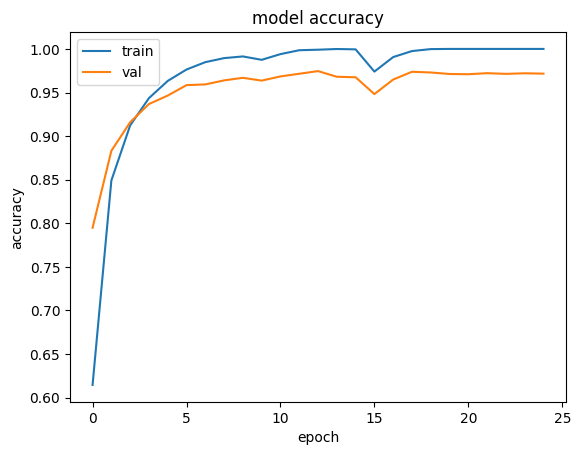

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

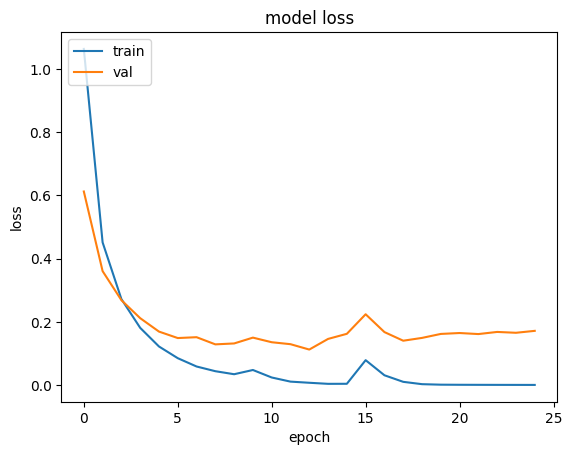

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Save Model

In [19]:
import tensorflow as tf

model.save('best_model.h5')
model.save_weights('best_model_weights.h5')

model = tf.keras.models.load_model('best_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("best_model1.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\mraji855\AppData\Local\Temp\tmpu3w4qnna\assets


INFO:tensorflow:Assets written to: C:\Users\mraji855\AppData\Local\Temp\tmpu3w4qnna\assets


9204404

# Model Evaluation on Validation Set

In [20]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 


In [21]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 14s - loss: 0.1610 - accuracy: 0.9721 - 14s/epoch - 46ms/step


294/294 [==============================] - 19s 61ms/step


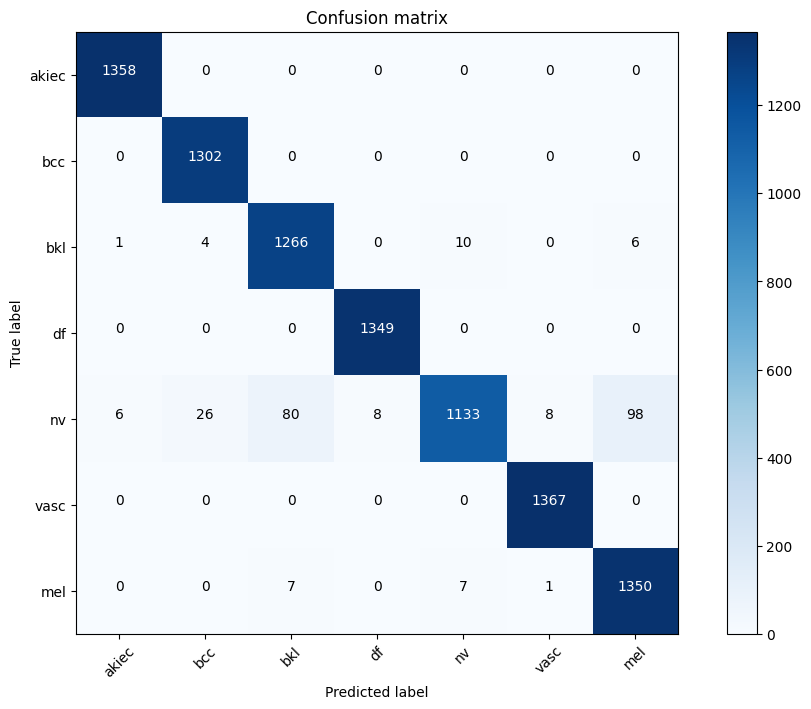

In [22]:
classes = {k:v[0] for k,v in classes.items()}
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values())

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.float32(Y_test), Y_pred.round()))
print('Classification Report')

294/294 [==============================] - 14s 47ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1358
         1.0       0.98      1.00      0.99      1302
         2.0       0.94      0.98      0.96      1287
         3.0       0.99      1.00      1.00      1349
         4.0       0.99      0.83      0.90      1359
         5.0       0.99      1.00      1.00      1367
         6.0       0.93      0.99      0.96      1365

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387

Classification Report


# Model Evaluation on Test Set

In [24]:
Y_testset = testset['label']
X_testset = testset.drop(columns = ['label'])

X_testset= np.array(X_testset).reshape(reshape)
print('Shape of X_testset :',X_testset.shape)

# Normalize the data
X_testset = (X_testset-np.mean(X_testset))/np.std(X_testset)

Shape of X_testset : (1511, 40, 40, 3)


In [25]:
loss, acc = model.evaluate(X_testset, Y_testset, verbose=2)

48/48 - 2s - loss: 4.0980 - accuracy: 0.5817 - 2s/epoch - 42ms/step


48/48 [==============================] - 2s 40ms/step


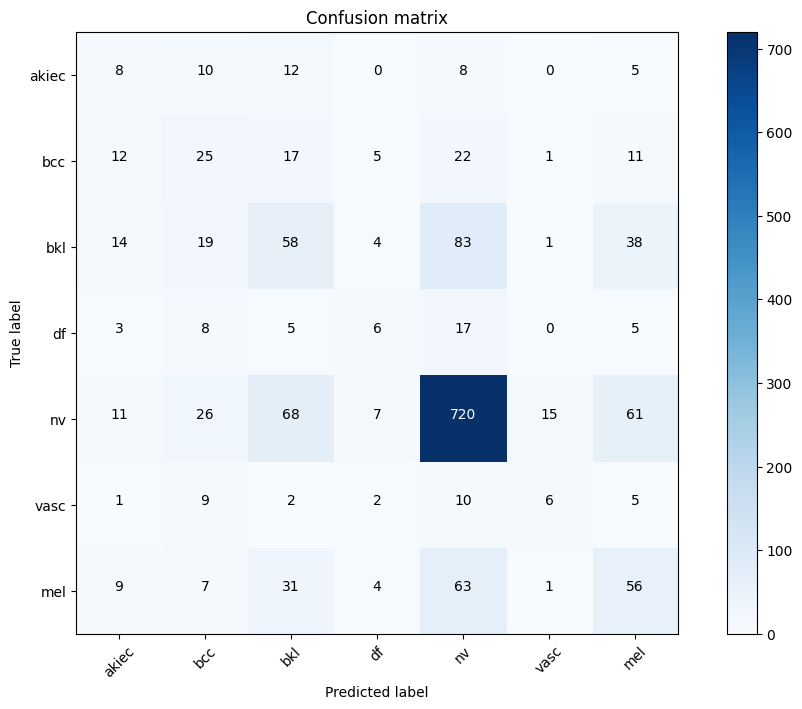

In [26]:
Y_testset_pred = model.predict(X_testset)
Y_testset_pred_classes = np.argmax(Y_testset_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_testset, Y_testset_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values())

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_testset_pred = np.argmax(model.predict(X_testset),axis=1)
print(classification_report(np.float32(Y_testset), Y_testset_pred.round()))
print('Classification Report')

48/48 [==============================] - 3s 52ms/step
              precision    recall  f1-score   support

         0.0       0.14      0.19      0.16        43
         1.0       0.24      0.27      0.25        93
         2.0       0.30      0.27      0.28       217
         3.0       0.21      0.14      0.17        44
         4.0       0.78      0.79      0.79       908
         5.0       0.25      0.17      0.20        35
         6.0       0.31      0.33      0.32       171

    accuracy                           0.58      1511
   macro avg       0.32      0.31      0.31      1511
weighted avg       0.58      0.58      0.58      1511

Classification Report
